# Classification Project: What Causes Telco Churn?

## --- Pipeline phase 1: Planning: ---

 ### In this notebook we will explore where drivers for churn or attrition might be based on a dataset snapshot of customers for a telecommunications service.  We will investigate differences between groups of customers and what might make one group or class different from another, and if that has any bearing on their propensity to leave the company.
 
 ### Please reference data_dictionary.py for explicit details on features.

In [16]:
# setting up our environment: 

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from acquire import get_telco_data
from telco_prep import *
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


from scipy.stats import ttest_ind as ttest
from scipy.stats import pearsonr

## --- Pipeline phase 2: Acquisition: ---

In [17]:
# call our function to pull our dataframe using mySQL:
df = get_telco_data()

In [18]:
# get info on dataframe 
peekatdata(df)

  customer_id  gender  senior_citizen partner dependents  tenure  \
0  0003-MKNFE    Male               0      No         No       9   
1  0013-MHZWF  Female               0      No        Yes       9   
2  0015-UOCOJ  Female               1      No         No       7   
3  0023-HGHWL    Male               1      No         No       1   
4  0032-PGELS  Female               0     Yes        Yes       1   

  phone_service    multiple_lines  internet_service_type_id online_security  \
0           Yes               Yes                         1              No   
1           Yes                No                         1              No   
2           Yes                No                         1             Yes   
3            No  No phone service                         1              No   
4            No  No phone service                         1             Yes   

             ...             streaming_movies contract_type_id  \
0            ...                          Yes     

## --- Pipeline Phase 3: Preparation: ---

In [19]:
# call function to prepare dataframe based on parameters outlined
# in prepare.py and curriculum instructions
df = prep_telco_data(df)

/Users/mcapper/Documents/Codeup/classification_project/classification_orion_matthew/telco_prep.py:134: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)


In [20]:
# get info on dataframe 
peekatdata(df)

  customer_id  gender  senior_citizen partner dependents  tenure  \
0  0003-MKNFE    Male               0      No         No       9   
1  0013-MHZWF  Female               0      No        Yes       9   
2  0015-UOCOJ  Female               1      No         No       7   
3  0023-HGHWL    Male               1      No         No       1   
4  0032-PGELS  Female               0     Yes        Yes       1   

  phone_service    multiple_lines  internet_service_type_id online_security  \
0           Yes               Yes                         1              No   
1           Yes                No                         1              No   
2           Yes                No                         1             Yes   
3            No  No phone service                         1              No   
4            No  No phone service                         1             Yes   

      ...      tenure_year phone_id household_type_id streaming_services  \
0     ...                1        2     

In [21]:
#drop our non-numeric columns as described in function notes
df = drop_cols(df)

In [22]:
# Numeric Scaling: scale the monthly_charges and total_charges data. 
# Make sure that the parameters for scaling are learned from the training data set.

# split the dataframe
X = df.drop(['churn'], axis = 1)
y = df[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=123)

#concatinate our X and y together to make a single test and train df
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# scale our monthly and total charges
scaler = MinMaxScaler()
scaler.fit(train[['monthly_charges', 'total_charges']])

train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
peekatdata(train)

      senior_citizen  tenure  contract_type_id  payment_type_id  \
1479               0      52                 2                1   
2377               0      59                 3                4   
6613               0      46                 3                3   
6468               0      55                 3                3   
2668               0      10                 1                1   

      monthly_charges  total_charges  tenure_year  phone_id  \
1479         0.502488       0.399729            5         1   
2377         0.716915       0.597190            5         2   
6613         0.019900       0.100571            4         1   
6468         0.074129       0.164418            5         2   
2668         0.613930       0.096746            1         1   

      household_type_id  streaming_services  online_security_backup  gender_e  \
1479                  3                   1                       2         1   
2377                  3                   3             

In [24]:
def drop_totals(df):
    df = df[pd.notna(df.total_charges)]
    return df
    


In [25]:
df = drop_totals(df)
train = drop_totals(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4921 entries, 1479 to 3582
Data columns (total 17 columns):
senior_citizen            4921 non-null int64
tenure                    4921 non-null int64
contract_type_id          4921 non-null int64
payment_type_id           4921 non-null int64
monthly_charges           4921 non-null float64
total_charges             4921 non-null float64
tenure_year               4921 non-null int64
phone_id                  4921 non-null int64
household_type_id         4921 non-null int64
streaming_services        4921 non-null int64
online_security_backup    4921 non-null int64
gender_e                  4921 non-null int64
device_protection_e       4921 non-null int64
tech_support_e            4921 non-null int64
paperless_billing_e       4921 non-null int64
int_type_id               4921 non-null int64
churn                     4921 non-null int64
dtypes: float64(2), int64(15)
memory usage: 692.0 KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
senior_citizen            7032 non-null int64
tenure                    7032 non-null int64
contract_type_id          7032 non-null int64
payment_type_id           7032 non-null int64
monthly_charges           7032 non-null float64
total_charges             7032 non-null float64
churn                     7032 non-null int64
tenure_year               7032 non-null int64
phone_id                  7032 non-null int64
household_type_id         7032 non-null int64
streaming_services        7032 non-null int64
online_security_backup    7032 non-null int64
gender_e                  7032 non-null int64
device_protection_e       7032 non-null int64
tech_support_e            7032 non-null int64
paperless_billing_e       7032 non-null int64
int_type_id               7032 non-null int64
dtypes: float64(2), int64(15)
memory usage: 988.9 KB


## --- Pipeline phase 4: Exploration: ---

In [27]:
# create array of our features:
cols = []
for col in train:
    cols.append(col)
cols


['senior_citizen',
 'tenure',
 'contract_type_id',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'tenure_year',
 'phone_id',
 'household_type_id',
 'streaming_services',
 'online_security_backup',
 'gender_e',
 'device_protection_e',
 'tech_support_e',
 'paperless_billing_e',
 'int_type_id',
 'churn']

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


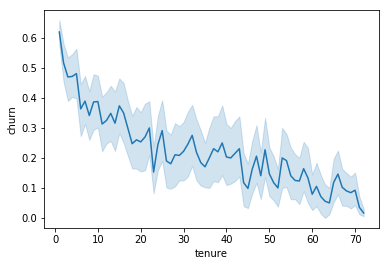

In [28]:
# #1: could month in which a customer signed up influence churn?
# consider this plot: 
sns.lineplot(x='tenure', y='churn', data=df)

#### We can note from this data visualization that there is a downward trend or negative correlation between tenure and attrition.  There are minor spikes that appear to be more correlated with the one year and two year marks than they do with a specific cohort, which overall is roughly consistent.  

In [29]:
# Are there features that indicate a higher 
# propensity to churn? like type of internet service, 
# type of phone service, online security and backup, 
#senior citizens, paying more than x% of customers with the 
#same services, etc.?

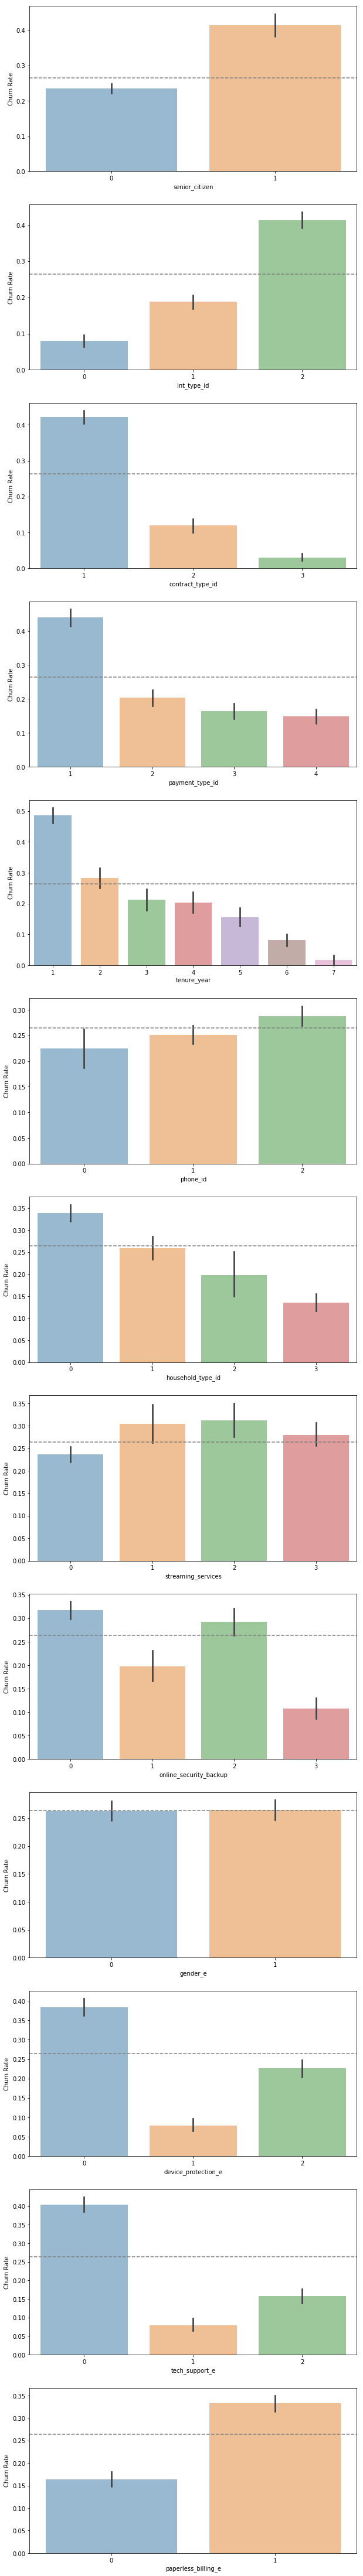

In [30]:
features = ['senior_citizen','int_type_id','contract_type_id','payment_type_id', 'tenure_year', 'phone_id', 'household_type_id', 'streaming_services', 'online_security_backup','gender_e', 'device_protection_e', 'tech_support_e', 'paperless_billing_e']

_, ax = plt.subplots(nrows=13, ncols=1, figsize=(10,80))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

#### From these visualizations, we can see that certain features lead to stronger churning trends.  Off the cuff, we notice that seniors have a stronger tendency to churn, as well as fiber customers and  customers without tech support.  People that have paperless billing churn more on average as well as customers that pay by electronic check, which are intrinsically bound.

In [31]:
#Is there a price threshold for specific services where the 
#likelihood of churn increases once price for those services 
# goes past that point? If so, what is that point for what 
#service(s)?

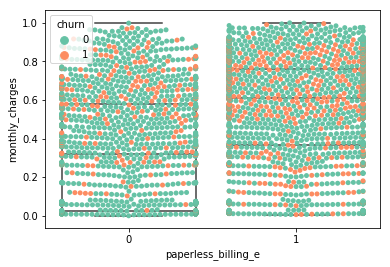

In [32]:
    sns.swarmplot(x="paperless_billing_e", y="monthly_charges", data=train, hue="churn", palette="Set2")
    ax = sns.boxplot(x="paperless_billing_e", y="monthly_charges", data=train,
            showcaps=True,boxprops={'facecolor':'None'},
            showfliers=True,whiskerprops={'linewidth':0})



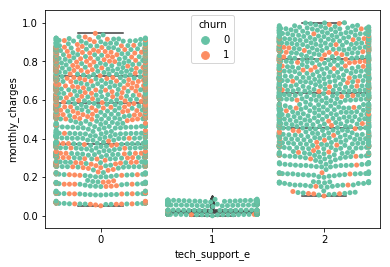

In [33]:
sns.swarmplot(x="tech_support_e", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="tech_support_e", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

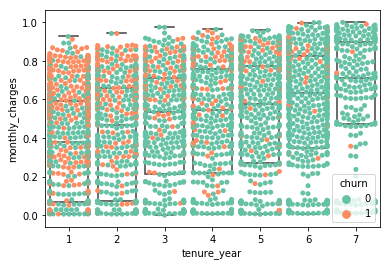

In [34]:
sns.swarmplot(x="tenure_year", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="tenure_year", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

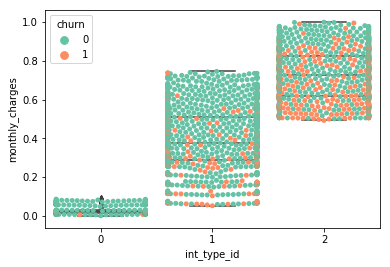

In [35]:
sns.swarmplot(x="int_type_id", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="int_type_id", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

In [36]:
higher_monthly_charges = train[['churn']][train.monthly_charges > train.monthly_charges.quantile(0.60)]
lower_monthly_charges = train[['churn']][train.monthly_charges < train.monthly_charges.quantile(0.60)]
ttest(higher_monthly_charges, lower_monthly_charges)

Ttest_indResult(statistic=array([9.65431347]), pvalue=array([7.35928275e-22]))

In [37]:
higher_monthly_charges = train[['monthly_charges', 'churn']][train.monthly_charges > train.monthly_charges.quantile(0.70)]
lower_monthly_charges = train[['monthly_charges', 'churn']][train.monthly_charges < train.monthly_charges.quantile(0.70)]

### # 4: is the churn rate significantly different for those on a month-to-month plan after month 12 than those on 1 year contracts after 12th month?


In [38]:
year_old_monthlies = train[train.tenure >= 12][train.contract_type_id == 1]
year_old_monthlies.head()
year_old_contract = train[train.tenure >= 12][train.contract_type_id == 2]
ttest(year_old_monthlies.churn, year_old_contract.churn)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Ttest_indResult(statistic=11.62871844836295, pvalue=2.016256590347219e-30)

In [39]:
# 5: are the mean monthly charges for those who have churned significantly different than for
# those who have not churned?
has_churned = train[train.churn == 1]
not_churned = train[train.churn == 0]
for col in train:
    ttest(has_churned.monthly_charges, not_churned.monthly_charges)
ttest(has_churned.monthly_charges, not_churned.monthly_charges)
ttest(has_churned[['int_type_id', 'monthly_charges']].monthly_charges, not_churned[['int_type_id', 'monthly_charges']].monthly_charges)

Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)

In [40]:
# How much of monthly_charges can be explained by internet_service_type? 
# (hint: correlation test). State your hypotheses and your conclusion clearly.
cor_test = train[['monthly_charges', 'int_type_id']]
cor_test.groupby('int_type_id').mean()
# sns.heatmap(cor_test.corr(), annot=True)
# pearsonr(cor_test.internet_service_type_id, cor_test.monthly_charges)
# pearsonr()

,monthly_charges
int_type_id,
0,0.028171
1,0.395717
2,0.727289


### #6: How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

In [41]:
pd.crosstab(train.int_type_id, train.churn, margins=True).style.background_gradient(cmap='YlOrRd')

churn,0,1,All
int_type_id,,,
0,973,84,1057
1,1372,317,1689
2,1277,898,2175
All,3622,1299,4921


In [42]:
pearsonr(train.int_type_id, train.monthly_charges)


(0.9057785531634638, 0.0)

In [43]:
no_int = train[train.int_type_id == 0]
dsl_int = train[train.int_type_id == 1]
fbr_int = train[train.int_type_id == 2]

In [44]:
for i in (no_int, dsl_int, fbr_int):
    print(ttest(i.monthly_charges, i.churn))
    print(pearsonr(i.monthly_charges, i.churn))

Ttest_indResult(statistic=-6.144262435971497, pvalue=9.574591818339245e-10)
(-0.10062997260841547, 0.0010525765500442844)
Ttest_indResult(statistic=20.250403785223245, pvalue=3.7887296775819554e-86)
(-0.25729957567116074, 6.057018899610641e-27)
Ttest_indResult(statistic=28.849608415494284, pvalue=1.2977112085035131e-167)
(-0.23017545767238606, 1.5193247315385181e-27)


In [45]:
features = ['senior_citizen','int_type_id','contract_type_id','payment_type_id', 'tenure_year', 'phone_id', 'household_type_id', 'streaming_services', 'online_security_backup','gender_e', 'device_protection_e', 'tech_support_e', 'paperless_billing_e']

for feature in features:
    print(ttest(has_churned[[feature, 'monthly_charges']].monthly_charges, not_churned[[feature, 'monthly_charges']].monthly_charges))
    

Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)
Ttest_indResult(statistic=13.27019984432466, pvalue=1.6352087292294022e-39)


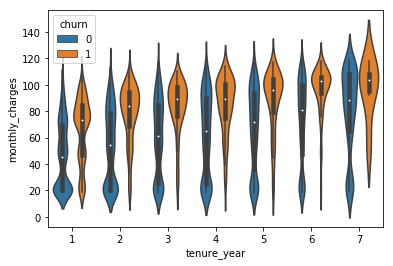

In [46]:
# figure = figsize(18,5)
sns.violinplot(x='tenure_year', y='monthly_charges', hue='churn', data=df)

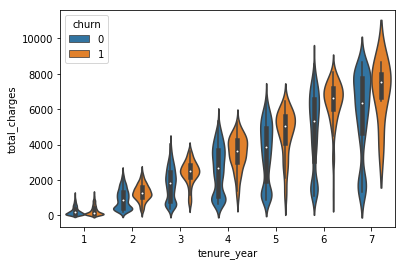

In [47]:
sns.violinplot(x='tenure_year', y='total_charges', hue='churn', data=df)

In [81]:
# df_ch = not_churned[['monthly_charges', 'tenure_year']].groupby('tenure_year', as_index=False).mean().sort_values(by='monthly_charges', ascending=False)

# df_nch = has_churned[['monthly_charges', 'tenure_year']].groupby('tenure_year', as_index=False).mean().sort_values(by='monthly_charges', ascending=False)

# df_nch['churn_charges'] = df_ch[['monthly_charges']]



,tenure_year,monthly_charges,churn_charges
5,6,0.791558,0.535264
6,7,0.733458,0.628901
4,5,0.672057,0.486314
2,3,0.657639,0.413491
3,4,0.657467,0.438705
1,2,0.600451,0.345606
0,1,0.470707,0.289498


In [126]:
cols = ['senior_citizen',
 'contract_type_id',
 'payment_type_id',
 'tenure_year',
 'phone_id',
 'household_type_id',
 'streaming_services',
 'online_security_backup',
 'gender_e',
 'device_protection_e',
 'tech_support_e',
 'paperless_billing_e',
 'int_type_id']
i = 0
for col in cols:
    i = 0
    for i in range(train[col].min(), train[col].max()+1):
        t_val = ttest(train[(train['churn'] == 1) & (train[col] == i)].monthly_charges, train[(train['churn'] == 0) & (train[col] == i)].monthly_charges)
        print(f't score for {col} value {i} between churn and unchurned monthly charges: {t_val[0]}, p value: {t_val[1]}\n')
        

t score for senior_citizen value 0 between churn and unchurned monthly charges: 11.872040567026081, p value: 5.478137884117978e-32

t score for senior_citizen value 1 between churn and unchurned monthly charges: 0.944334113440332, p value: 0.3452822756900191

t score for contract_type_id value 1 between churn and unchurned monthly charges: 10.822047734347745, p value: 9.504390314415518e-27

t score for contract_type_id value 2 between churn and unchurned monthly charges: 7.473138889649153, p value: 1.6680329744675264e-13

t score for contract_type_id value 3 between churn and unchurned monthly charges: 3.871350610380477, p value: 0.0001141412061140942

t score for payment_type_id value 1 between churn and unchurned monthly charges: 3.3394606871762282, p value: 0.0008577940832036358

t score for payment_type_id value 2 between churn and unchurned monthly charges: 7.054139766076875, p value: 3.051970370807133e-12

t score for payment_type_id value 3 between churn and unchurned monthly ch